In [2]:
# kill previous docker
# sudo docer contrainer ls
# sudo docker rm <>

# bash command to run local datajoint server
# sudo docker run -p 3306:3306 -e MYSQL_ROOT_PASSWORD=simple datajoint/mysql

# configure mysql server
# mysql > CREATE USER 'root'@'%' IDENTIFIED BY 'password';
# mysql > GRANT ALL PRIVILEGES ON *.* TO 'root'@'%';

In [3]:
from dj_connection import connect_noTLS

# connect first
connect_noTLS()

In [4]:
from foundation_tables import Mouse

# First, add our mice 
mice = [{"prefix" : "RL1" , "mouse_id" : 1},{"prefix" : "RL1" , "mouse_id" : 5}]
mouse = Mouse()
mouse.insert(mice, skip_duplicates=True)
Mouse() # should now show RL1_1 and RL1_5 in table

prefix mouse training group,mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
RL1,1,None,None
RL1,5,None,None


In [5]:
from foundation_tables import Date
from dj_utils import update_date

# Next, add dates when we collected data for these mice
update_date()
Date() # should now show 6 dates in 2022-01

session_date date where we had some form of data collection
2022-01-12
2022-01-13
2022-01-14
2022-01-15
2022-01-16
2022-01-25


In [3]:
from foundation_tables import BehaviorSession

# Now, run populate calls on BehaviorSession and PhotometrySession 
BehaviorSession().populate()

# should now see these two having 10 entries 
BehaviorSession()

prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,beha_session_time time of session,beha_path path to behavior data,"beha_data matrix of behavior data, flexible to task"
RL1,1,2022-01-12,16_39_06,./mouse_data/RL1/1/20220112/behavior2022-01-12T16_39_06.csv,=BLOB=
RL1,1,2022-01-13,18_14_22,./mouse_data/RL1/1/20220113/behavior2022-01-13T18_14_22.csv,=BLOB=
RL1,1,2022-01-14,15_14_10,./mouse_data/RL1/1/20220114/behavior2022-01-14T15_14_10.csv,=BLOB=
RL1,1,2022-01-16,17_38_14,./mouse_data/RL1/1/20220116/behavior2022-01-16T17_38_14.csv,=BLOB=
RL1,1,2022-01-25,16_42_21,./mouse_data/RL1/1/20220125/behavior2022-01-25T16_42_21.csv,=BLOB=
RL1,5,2022-01-12,18_47_24,./mouse_data/RL1/5/20220112/behavior2022-01-12T18_47_24.csv,=BLOB=
RL1,5,2022-01-13,15_01_03,./mouse_data/RL1/5/20220113/behavior2022-01-13T15_01_03.csv,=BLOB=
RL1,5,2022-01-14,17_39_06,./mouse_data/RL1/5/20220114/behavior2022-01-14T17_39_06.csv,=BLOB=
RL1,5,2022-01-15,14_48_10,./mouse_data/RL1/5/20220115/behavior2022-01-15T14_48_10.csv,=BLOB=
RL1,5,2022-01-16,18_12_46,./mouse_data/RL1/5/20220116/behavior2022-01-16T18_12_46.csv,=BLOB=


In [4]:
from foundation_tables import PhotometrySession

# populate it
PhotometrySession().populate() 

# see what's in it
PhotometrySession()

prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,photometry_path path to photometry data
RL1,1,2022-01-12,16_42_30,./mouse_data/RL1/1/20220112/Photometry2022-01-12T16_42_30.csv
RL1,1,2022-01-13,18_17_49,./mouse_data/RL1/1/20220113/Photometry2022-01-13T18_17_49.csv
RL1,1,2022-01-14,15_17_43,./mouse_data/RL1/1/20220114/Photometry2022-01-14T15_17_43.csv
RL1,1,2022-01-16,17_41_23,./mouse_data/RL1/1/20220116/Photometry2022-01-16T17_41_23.csv
RL1,1,2022-01-25,16_45_35,./mouse_data/RL1/1/20220125/Photometry2022-01-25T16_45_35.csv
RL1,5,2022-01-12,18_50_47,./mouse_data/RL1/5/20220112/Photometry2022-01-12T18_50_47.csv
RL1,5,2022-01-13,15_04_20,./mouse_data/RL1/5/20220113/Photometry2022-01-13T15_04_20.csv
RL1,5,2022-01-14,17_42_36,./mouse_data/RL1/5/20220114/Photometry2022-01-14T17_42_36.csv
RL1,5,2022-01-15,14_51_31,./mouse_data/RL1/5/20220115/Photometry2022-01-15T14_51_31.csv
RL1,5,2022-01-16,18_15_52,./mouse_data/RL1/5/20220116/Photometry2022-01-16T18_15_52.csv


In [5]:
from photometry_preprocessing import PhotometryPreprocessingParam

# Now add in some parameters to preprocess our photometry data
# This corrects for motion artifacts and changes in the baseline fluorescence
preprocessing_params0 = {
    'photometry_preprocessing_param_id' : 0 ,
    "median_filt_kernel_size" : 5,
    "lowpass_filter_frequency" : 10,
    "photobleaching_estim_method" : "polyFit_baseline",
    "photobleaching_estim_params" : {"polyfit_deg" : 4},
    "baseline_fluorescence_signal" : 'denoised',
    "baseline_fluorescence_lowpass_freq" : 0.001
}
PhotometryPreprocessingParam().insert1(preprocessing_params0, skip_duplicates = True)

PhotometryPreprocessingParam() # should now see one parameter set, using the polyFit_baseline method

photometry_preprocessing_param_id unique id for photometry preprocessing parameter set,median_filt_kernel_size,lowpass_filter_frequency,photobleaching_estim_method,photobleaching_estim_params,baseline_fluorescence_signal,baseline_fluorescence_lowpass_freq
0,5,10,polyFit_baseline,=BLOB=,denoised,0.001


In [6]:
from photometry_preprocessing import ProcessedPhotometry

# Now populate ProcessedPhotometry 
ProcessedPhotometry().populate() 
ProcessedPhotometry() # you should now see 10 entries here, and can also look in the data folders to see visualizations of intermediate pr

photometry_preprocessing_param_id unique id for photometry preprocessing parameter set,prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,sample_times timepoints when we sampled the GCaMP frequency,df_over_f time series of normalized fluorescence values
0,RL1,1,2022-01-12,16_42_30,=BLOB=,=BLOB=
0,RL1,1,2022-01-13,18_17_49,=BLOB=,=BLOB=
0,RL1,1,2022-01-14,15_17_43,=BLOB=,=BLOB=
0,RL1,1,2022-01-16,17_41_23,=BLOB=,=BLOB=
0,RL1,1,2022-01-25,16_45_35,=BLOB=,=BLOB=
0,RL1,5,2022-01-12,18_50_47,=BLOB=,=BLOB=
0,RL1,5,2022-01-13,15_04_20,=BLOB=,=BLOB=
0,RL1,5,2022-01-14,17_42_36,=BLOB=,=BLOB=
0,RL1,5,2022-01-15,14_51_31,=BLOB=,=BLOB=
0,RL1,5,2022-01-16,18_15_52,=BLOB=,=BLOB=


In [7]:
from behavior_processing import PhotometrySyncBehavior

# Now populate PhotometrySyncBehavior 
PhotometrySyncBehavior().populate()

PhotometrySyncBehavior() # you should now see 10 entries here

prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,beha_session_time time of session,wheel_position,running_speed,reward,gain,trial_num
RL1,1,2022-01-12,16_42_30,16_39_06,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-13,18_17_49,18_14_22,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-14,15_17_43,15_14_10,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-16,17_41_23,17_38_14,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-25,16_45_35,16_42_21,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,5,2022-01-12,18_50_47,18_47_24,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,5,2022-01-13,15_04_20,15_01_03,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,5,2022-01-14,17_42_36,17_39_06,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,5,2022-01-15,14_51_31,14_48_10,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,5,2022-01-16,18_15_52,18_12_46,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [1]:
from behavior_processing import GainChangeEvents

# Last, populate GainChangeEvents, which pulls out the photometry sample number when we had a gain change / glitch and information about said gain change / glitch
GainChangeEvents().populate()

GainChangeEvents()

[2023-05-07 17:45:31,104][INFO]: Connecting root@0.0.0.0:3306
[2023-05-07 17:45:31,108][INFO]: Connected root@0.0.0.0:3306


prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,beha_session_time time of session,gain_change_samples,gain_change_magnitudes,delta_position,gain_pre,gain_post
RL1,1,2022-01-12,16_42_30,16_39_06,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-13,18_17_49,18_14_22,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-14,15_17_43,15_14_10,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-16,17_41_23,17_38_14,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,1,2022-01-25,16_45_35,16_42_21,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,5,2022-01-12,18_50_47,18_47_24,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,5,2022-01-13,15_04_20,15_01_03,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,5,2022-01-14,17_42_36,17_39_06,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,5,2022-01-15,14_51_31,14_48_10,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL1,5,2022-01-16,18_15_52,18_12_46,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


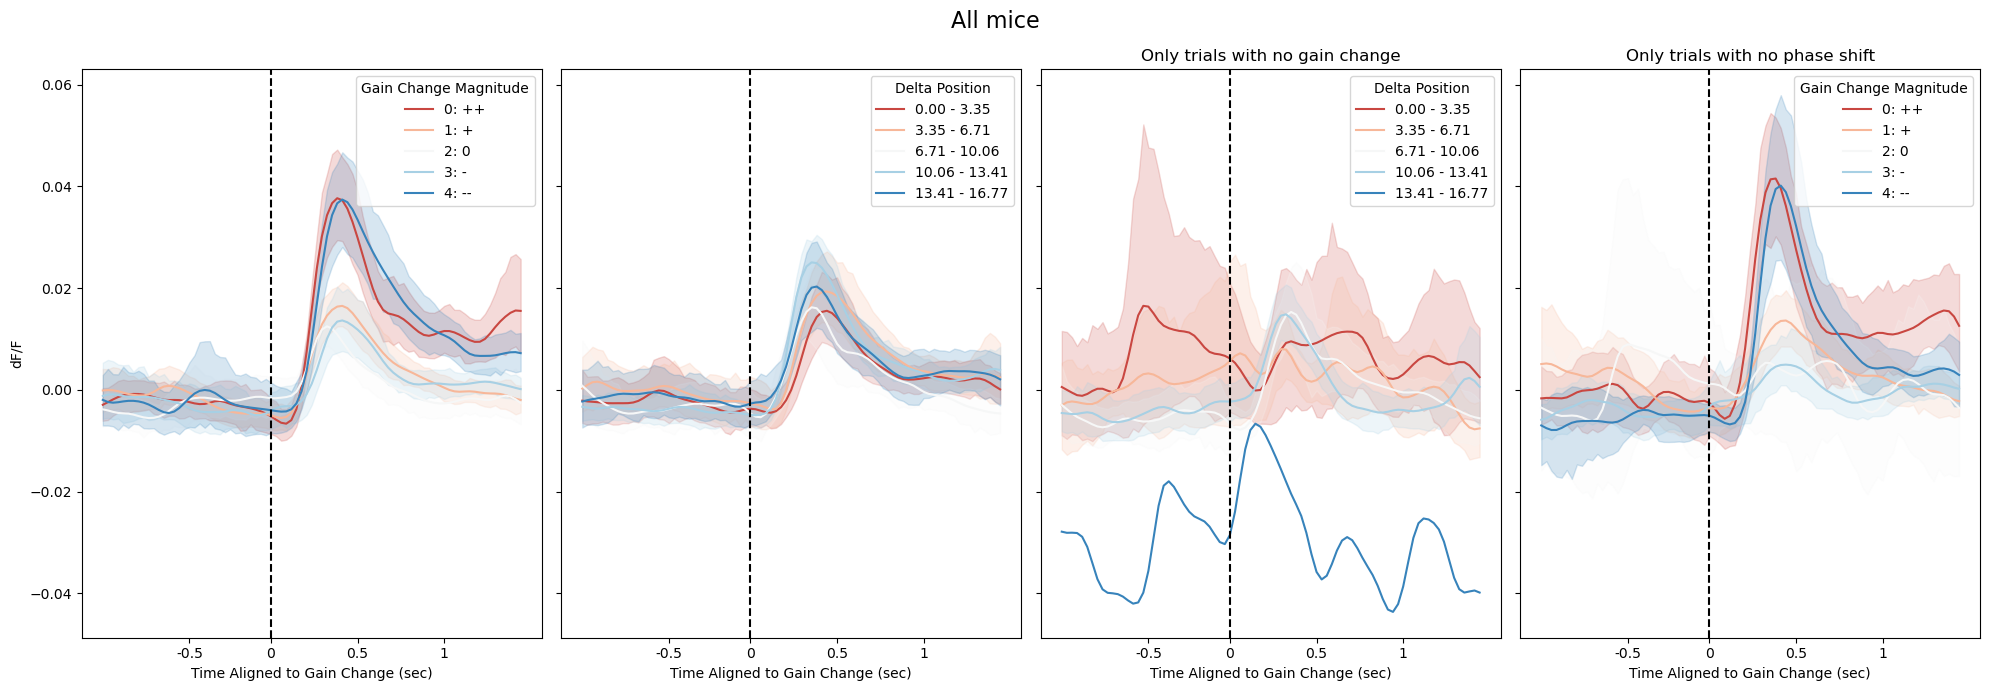

In [2]:
from visualizations import trace_visualization

# Last, visualize data for a mouse to see how things look 
key = {"prefix" : 1}
trace_visualization(key, pooling = 'all')

  Gain Change Magnitude Delta Position  Gain Pre  Gain Post  \
0                  1: +    0.00 - 3.35       1.0        3.0   
1                 4: --    0.00 - 3.35       3.0        0.3   
2                  1: +  10.06 - 13.41       0.3        1.0   
3                  3: -    3.35 - 6.71       1.0        0.3   
4                 0: ++  10.06 - 13.41       0.3        3.0   

  Time Aligned to Gain Change (sec)      dF/F  
0                                 0 -0.004691  
1                                 0 -0.009599  
2                                 0 -0.003673  
3                                 0  0.000552  
4                                 0 -0.001093  
{'prefix': 'RL1'}


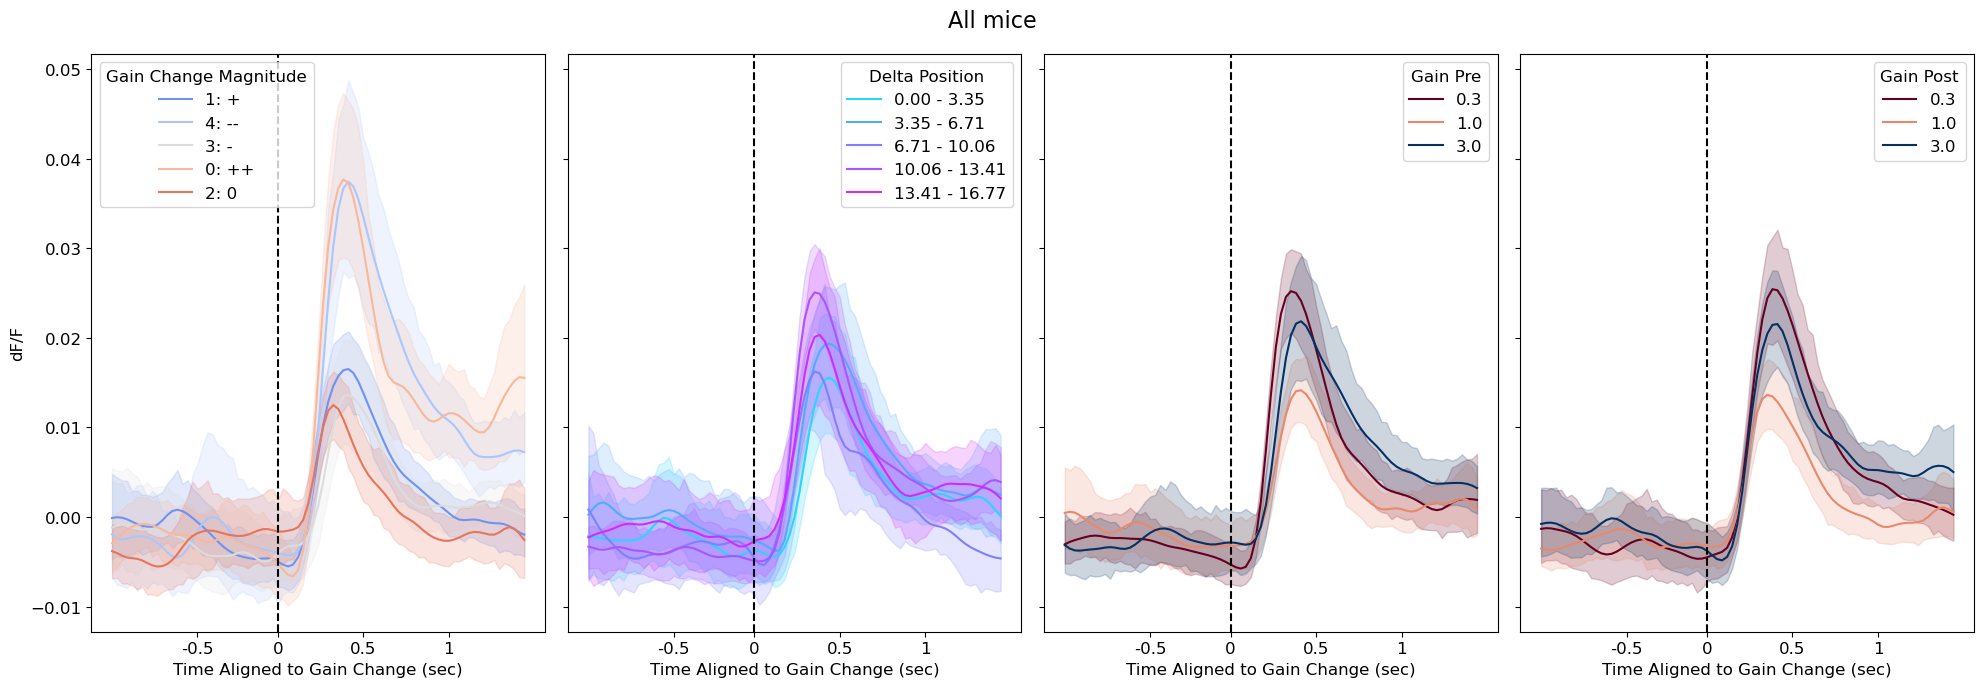

In [13]:
from visualizations import trace_visualization

for key in [{"prefix" : "RL1"}]: # (ProcessedPhotometry()).fetch('KEY'): 
    trace_visualization(key, pooling = 'all') 
    print(key)

In [9]:
from visualization_utils import get_gain_change_data
import numpy as np
import pandas as pd

# now gather data within time window to get pt estimates 
time_pre = 0
time_post = 0.75
gain_change_magnitudes , delta_position , gain_pre , gain_post , gain_change_psth , _ , _ , _ , _ = get_gain_change_data({"prefix" : 1},'all',time_pre,time_post)
print(gain_change_psth.shape)
mean_signal = gain_change_psth.sum(axis = 1)

# bin delta position around max potential delta  
n_delta_position_bins = 5
sinusoid_frequency = 50/3 # from romain 
delta_position_binEdges = np.linspace(0,sinusoid_frequency + .1,n_delta_position_bins + 1)
delta_position_digitized = np.digitize(delta_position,delta_position_binEdges) - 1 
bin_names = ["%.2f - %.2f"%tuple(delta_position_binEdges[[i,i+1]]) for i in range(len(delta_position_binEdges)- 1)] 
delta_position_discr = np.full(len(delta_position_digitized),"              ")
for i_bin in range(n_delta_position_bins): 
    delta_position_discr[delta_position_digitized == i_bin] = np.full(len(delta_position_discr[delta_position_digitized == i_bin]),bin_names[i_bin])
delta_position_discr = pd.Categorical(delta_position_discr,categories=bin_names,ordered=True)

# pandas dataframe it 
signal_name = 'dF/F %.2f-%.2f'%(time_pre,time_post)
gain_change_df = pd.DataFrame({signal_name : mean_signal}) 
gain_change_df['Gain Change Magnitude'] = gain_change_magnitudes 
gain_change_df['Delta Position'] = delta_position_discr
gain_change_df['Gain Pre'] = gain_pre 
gain_change_df['Gain Post'] = gain_post


(217, 25)


In [10]:
gain_change_df["Gain Change Magnitude"].unique()

array(['1: +', '4: --', '3: -', '0: ++', '2: 0'], dtype=object)

<AxesSubplot: xlabel='Gain Change Magnitude', ylabel='dF/F 0.00-0.75'>

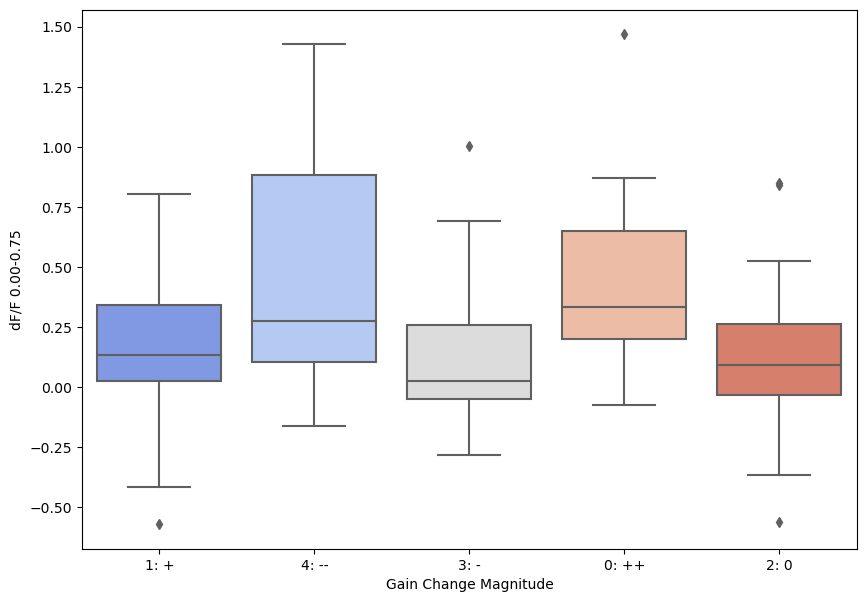

In [13]:
import seaborn as sns
sns.boxplot(x = "Gain Change Magnitude", y = signal_name, data = gain_change_df,palette = 'coolwarm')
# sns.scatterplot(x = "Gain Change Magnitude", y = signal_name, data = gain_change_df,palette = 'coolwarm')